In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
data.shape

(569, 32)

In [4]:
# Check for frequency of B and M
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [ ]:
# Split the dataset into input and output--> Train and test
# Train--> Building the model
# Test--> How well the model has learnt(Generaize on unseen data)

In [6]:
# Preparing Input and Output
# Drop the id and diagnosis columns
X = data.drop(['id', 'diagnosis'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [7]:
#Accessing Output Column
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [8]:
#Preparing Training and Testing Data
#Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=10)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(398, 30)
(171, 30)
(398,)
(171,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
431,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.094510,0.1860,0.05941,...,21.860,26.20,142.20,1493.0,0.14920,0.25360,0.375900,0.15100,0.3074,0.07863
389,16.300,15.70,104.70,819.8,0.09427,0.06712,0.055260,0.045630,0.1711,0.05657,...,17.320,17.76,109.80,928.2,0.13540,0.13610,0.194700,0.13570,0.2300,0.07230
309,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,0.06303,...,14.980,17.13,101.10,686.6,0.13760,0.26980,0.257700,0.09090,0.3065,0.08177
111,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.16300,0.43100,0.538100,0.07879,0.3322,0.14860
35,13.660,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.024710,0.1792,0.05897,...,14.540,19.64,97.96,657.0,0.12750,0.31040,0.256900,0.10540,0.3387,0.09638
469,14.040,15.98,89.78,611.2,0.08458,0.05895,0.035340,0.029440,0.1714,0.05898,...,15.660,21.58,101.20,750.0,0.11950,0.12520,0.111700,0.07453,0.2725,0.07234
326,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,15.330,30.28,98.27,715.5,0.12870,0.15130,0.062310,0.07963,0.2226,0.07617
410,12.890,14.11,84.95,512.2,0.08760,0.13460,0.137400,0.039800,0.1596,0.06409,...,14.390,17.70,105.00,639.1,0.12540,0.58490,0.772700,0.15610,0.2639,0.11780
160,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.026480,0.1386,0.05318,...,16.360,22.35,104.50,830.6,0.10060,0.12380,0.135000,0.10010,0.2027,0.06206
560,14.250,21.72,93.63,633.0,0.09823,0.10980,0.131900,0.055980,0.1885,0.06125,...,15.890,30.36,116.20,799.6,0.14460,0.42380,0.518600,0.14470,0.3591,0.10140


In [ ]:
#Before Splitting if you apply standardization--> you are considering whole
# you are including test data also into training data

In [10]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.077524,0.385200,-0.028576,-0.181721,1.617086,1.210962,0.105416,0.353917,1.441699,1.621128,...,0.217083,0.452310,0.154687,0.075338,1.470507,0.755583,0.005892,0.674696,0.532371,1.661987
1,-0.644210,-0.376307,-0.630196,-0.629478,0.808428,-0.078482,-0.406623,-0.055776,-0.746101,0.554649,...,-0.541540,0.425511,-0.526524,-0.549443,0.146485,-0.400616,-0.607829,-0.159783,-0.649397,-0.331922
2,-0.392671,-0.471786,-0.431337,-0.427265,-0.688285,-0.898236,-0.696996,-0.630673,-0.010737,-0.617927,...,-0.362539,-0.550999,-0.430883,-0.402265,-0.391807,-0.613767,-0.364118,-0.197839,0.654169,-0.558780
3,-0.415801,-0.665074,-0.404851,-0.475219,1.400979,0.139137,-0.325629,-0.363643,0.516091,0.465086,...,-0.526623,-0.676622,-0.583600,-0.549987,1.149269,-0.465763,-0.363183,-0.417921,0.464889,-0.448273
4,-0.629754,-0.604526,-0.499866,-0.603191,0.933909,1.316231,1.011138,0.733116,3.205109,1.510897,...,-0.490396,0.157515,-0.421319,-0.478029,0.302763,1.014906,0.860048,1.146956,4.775544,1.019133
5,-0.311716,-0.758224,-0.300167,-0.371512,-0.622756,-0.117527,-0.455269,-0.414291,-0.087566,-0.054374,...,-0.332705,-0.606273,-0.259655,-0.383596,-0.014135,0.038335,-0.269160,-0.156726,1.113380,-0.140128
6,-0.326172,0.510954,-0.346833,-0.364868,-1.407712,-0.345864,-0.300805,-0.738068,-0.811954,-0.221098,...,-0.349753,0.263038,-0.430574,-0.379971,-1.628140,-0.348752,-0.387039,-0.847388,-0.632938,-0.122596
7,0.471816,0.047529,0.383435,0.340277,-1.206245,-0.862636,-0.541152,-0.478198,-0.932686,-1.145655,...,0.398215,1.043576,0.318202,0.241366,-1.003896,-0.430343,-0.189638,-0.393926,-0.311984,-0.824953
8,0.879483,1.118762,0.921571,0.746726,1.672855,0.925780,1.961495,1.956892,1.631942,0.148174,...,1.031110,1.113925,0.941411,0.885542,1.383686,0.677786,1.367116,1.119446,1.082107,0.053259
9,-0.895750,-0.828087,-0.860585,-0.814359,0.348330,0.108514,-0.427561,-0.816560,0.216092,0.775109,...,-0.873970,-1.019992,-0.765318,-0.765497,0.072687,0.892202,0.327253,-0.485933,-0.479867,1.284775


In [11]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')

In [12]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B

In [13]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96       259
           M       1.00      0.85      0.92       139

   micro avg       0.95      0.95      0.95       398
   macro avg       0.96      0.92      0.94       398
weighted avg       0.95      0.95      0.95       398



In [14]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.9532163742690059,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9707602339181286,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

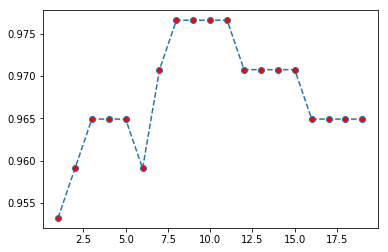

In [15]:
#Plot of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [16]:
# Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [17]:
#Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B

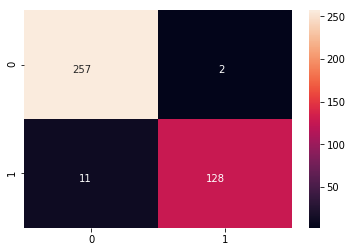

In [18]:
#Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, 
            fmt='d', annot_kws={'va':'top','ha':'right'}) # d--> integer formatting

In [19]:
#Classification report for training Data
#Precision--> PPV--> Out of the positive predicted values, how many truely positive
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       259
           M       0.98      0.92      0.95       139

   micro avg       0.97      0.97      0.97       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.97      0.97       398



In [20]:
#Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M'], dtype=object)

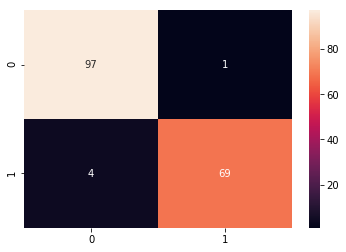

In [21]:
#Compare actual values of test data(y_test) and final_test_pred(model predicted values)
#Confusion_matrix(actualValues, predictedValues)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [22]:
#Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        98
           M       0.99      0.95      0.97        73

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

